<h1><b>BIG DATA PREDICTIVE ANALYTICS LANJUT (BDPAL)</b></h1>

<h2><b>BIND STORAGE GOOGLE DRIVE</b></h2>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2><b>INSTALLING PYSPARK WITH SOURCE CODE</b><h2>

In [13]:
# # Mengunduh Spark langsung dari tautan
# !wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
# # Mengekstrak arsip tgz
# !tar xf spark-3.4.1-bin-hadoop3.tgz

<h2><b>INSTALLING PYSPARK FROM PIP (Python PIP)</b></h2>

In [14]:
!pip install pyspark

<h2><b>INSTALLING PACKAGE FINDSPARK For SEARCH LOCATION LIBRARY SPARK</b></h2>

In [15]:
!pip install findspark

In [16]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.10/dist-packages/pyspark'

<h2><b>SETTING LOCATION LIBRARY SPARK & JAVA</b></h2>

In [17]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = findspark.find()

<h2><b>CREATE SESSION SPARK AND OPEN SPARK UI SERVICE</b></h2>

In [23]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Basic Spark (Asisten Praktikum BDPAL)")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

<h2><b>CREATE SPARK SESSION ONLY</b></h2>

In [24]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

<h2><b>CHECK VERSION SESSION SPARK</b></h2>

In [21]:
print(spark.version)

3.5.2


<h2><b/>READ DATASET CSV FILE</b></h2>

In [29]:
filepath = "/content/drive/MyDrive/BDPAL/Basic Spark/data_car.csv"

In [30]:
df = spark.read.csv(filepath, header = True, inferSchema = True)

df

DataFrame[Make: string, Model: string, Year: int, Engine Fuel Type: string, Engine HP: int, Engine Cylinders: int, Transmission Type: string, Driven_Wheels: string, Number of Doors: int, Market Category: string, Vehicle Size: string, Vehicle Style: string, highway MPG: int, city mpg: int, Popularity: int, MSRP: int]

<h2><b>MENAMPILKAN 10 BARIS TERATAS DATASET</b></h2>

In [27]:
df.show(10)

+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|   Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL|rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|rear wheel drive|              2|  Luxury,Performance|     Compact|  Convertible

<h2><b>MENAMPILKAN STRUKTUR DATASET</b></h2>

In [28]:
df.printSchema()

root
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Engine Fuel Type: string (nullable = true)
 |-- Engine HP: integer (nullable = true)
 |-- Engine Cylinders: integer (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Driven_Wheels: string (nullable = true)
 |-- Number of Doors: integer (nullable = true)
 |-- Market Category: string (nullable = true)
 |-- Vehicle Size: string (nullable = true)
 |-- Vehicle Style: string (nullable = true)
 |-- highway MPG: integer (nullable = true)
 |-- city mpg: integer (nullable = true)
 |-- Popularity: integer (nullable = true)
 |-- MSRP: integer (nullable = true)



<h2><b>MENAMPILKAN TIPE DATA VARIABLE DF</b></h2>

In [31]:
type(df)

pyspark.sql.dataframe.DataFrame

<h2><b>MELIHAT DAFTAR KOLOM PADA DATASET (RETURN ARRAY DATATYPE)</b></h2>

In [32]:
df.columns

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

<h2><b>MELIHAT 5 DATA TERATAS DATAFRAM (RETURN LIST)</b></h2>

In [35]:
df.head(5)

[Row(Make='BMW', Model='1 Series M', Year=2011, Engine Fuel Type='premium unleaded (required)', Engine HP=335, Engine Cylinders=6, Transmission Type='MANUAL', Driven_Wheels='rear wheel drive', Number of Doors=2, Market Category='Factory Tuner,Luxury,High-Performance', Vehicle Size='Compact', Vehicle Style='Coupe', highway MPG=26, city mpg=19, Popularity=3916, MSRP=46135),
 Row(Make='BMW', Model='1 Series', Year=2011, Engine Fuel Type='premium unleaded (required)', Engine HP=300, Engine Cylinders=6, Transmission Type='MANUAL', Driven_Wheels='rear wheel drive', Number of Doors=2, Market Category='Luxury,Performance', Vehicle Size='Compact', Vehicle Style='Convertible', highway MPG=28, city mpg=19, Popularity=3916, MSRP=40650),
 Row(Make='BMW', Model='1 Series', Year=2011, Engine Fuel Type='premium unleaded (required)', Engine HP=300, Engine Cylinders=6, Transmission Type='MANUAL', Driven_Wheels='rear wheel drive', Number of Doors=2, Market Category='Luxury,High-Performance', Vehicle Size

In [36]:
print(f"Tipe Data dengan fungsi head() : {type(df.head(5))}")

Tipe Data dengan fungsi head() : <class 'list'>


<h2><b>MEMILIH KOLOM-KOLOM TERTENTU UNTUK DI TAMPIKAN DENGAN FUNGSI SELECT()</b></h2>

In [38]:
df.select("Make").show(5)

+----+
|Make|
+----+
| BMW|
| BMW|
| BMW|
| BMW|
| BMW|
+----+
only showing top 5 rows



In [41]:
df.select("Make","Model","Year").show(5)

+----+----------+----+
|Make|     Model|Year|
+----+----------+----+
| BMW|1 Series M|2011|
| BMW|  1 Series|2011|
| BMW|  1 Series|2011|
| BMW|  1 Series|2011|
| BMW|  1 Series|2011|
+----+----------+----+
only showing top 5 rows



<h2><b>MENGHAPUS KOLOM</b></h2>

In [ ]:
df = df.drop('Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size')
df.show()

<h2><b>MENGGANTI NAMA KOLOM</b></h2>

In [ ]:
df = df.withColumnRenamed("Engine HP", "HP") \
       .withColumnRenamed("Engine Cylinders", "Cylinders") \
       .withColumnRenamed("Transmission Type", "Transmission") \
       .withColumnRenamed("Driven_Wheels", "Drive Mode") \
       .withColumnRenamed("highway MPG", "MPG-H") \
       .withColumnRenamed("city mpg", "MPG-C") \
       .withColumnRenamed("MSRP", "Price")

<h2><b>CEK KEMBALI DATAFRAME</b></h2>

In [42]:
df.show()

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL| rear wheel drive|              2|  Luxury,Performance|     Compact|  Conver

<h2><b>DEBUGGING ERROR</b></h2>

In [46]:
# Kenapa Error?
# df.select("Make", "Price").show(5)

<h2><b>MENAMPILKAN KOLOM DENGAN INDEX</b></h2>

In [48]:
df.select(df[1]).show(5)

+----------+
|     Model|
+----------+
|1 Series M|
|  1 Series|
|  1 Series|
|  1 Series|
|  1 Series|
+----------+
only showing top 5 rows



<h2><b>MEMBUAT PERHITUNGAN DASAR SETIAP KOLOM (Hanya Kolom INT Saja yang di hitung)</b></h2>

In [49]:
df.describe().show()

+-------+-----+------------------+------------------+----------------+------------------+-----------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+-----------------+------------------+------------------+
|summary| Make|             Model|              Year|Engine Fuel Type|         Engine HP| Engine Cylinders|Transmission Type|   Driven_Wheels|   Number of Doors|   Market Category|Vehicle Size|Vehicle Style|       highway MPG|         city mpg|        Popularity|              MSRP|
+-------+-----+------------------+------------------+----------------+------------------+-----------------+-----------------+----------------+------------------+------------------+------------+-------------+------------------+-----------------+------------------+------------------+
|  count|11914|             11914|             11914|           11911|             11845|            11884|            11914|           11914|         

<h2><b>MEMBUAT KOLOM BARU DENGAN PERHITUNGAN DARI BEBERAPA KOLOM</b></h2>

In [56]:
df = df.withColumn("ratio_price_hp", (df["Engine HP"]/df["Engine Cylinders"])*100)

In [57]:
df.show()

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|    ratio_price_hp|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135| 5583.333333333334|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|

<h2><b>MENAMPIKAN DATA DAN MENGHAPUS ROW YANG MEMILIKI DATA NA/NULL</b></h2>

In [58]:
df.na.drop().show()

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|    ratio_price_hp|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135| 5583.333333333334|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|

<h2><b>MENGHAPUS ROW JIKA ADA NA / NULL data di 1 atau lebih kolom</b><h2>

In [61]:
df.na.drop(how = "any").show()

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|    ratio_price_hp|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135| 5583.333333333334|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|

<h2><b>MENGHAPUS ROW JIKA PADA KOLOM YEAR TERDAPAT DATA NA/NULL/NIL</b><h2>

In [60]:
df.na.drop(how = "any", subset = ["Year"]).show()

+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
|Make|     Model|Year|    Engine Fuel Type|Engine HP|Engine Cylinders|Transmission Type|    Driven_Wheels|Number of Doors|     Market Category|Vehicle Size|Vehicle Style|highway MPG|city mpg|Popularity| MSRP|    ratio_price_hp|
+----+----------+----+--------------------+---------+----------------+-----------------+-----------------+---------------+--------------------+------------+-------------+-----------+--------+----------+-----+------------------+
| BMW|1 Series M|2011|premium unleaded ...|      335|               6|           MANUAL| rear wheel drive|              2|Factory Tuner,Lux...|     Compact|        Coupe|         26|      19|      3916|46135| 5583.333333333334|
| BMW|  1 Series|2011|premium unleaded ...|      300|               6|           MANUAL|

<h2><b>VISUALISASI DATA</b></h2>

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Make')

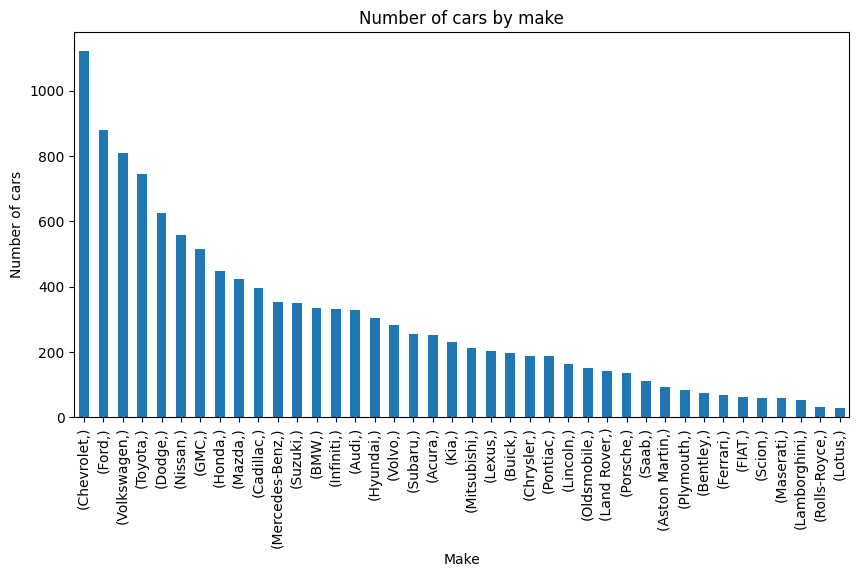

In [81]:
df.select("Make").toPandas().value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')